# Relevant links:
**LIVE app:** https://ind320-app-vkwrrsg5bd6sj3fnhxadwe.streamlit.app
**GitHub-repo:** https://github.com/marensofiesteen/IND320-streamlit

## Purpose:
Briefly document the data, preprocessing, and a simple EDA (exploratory data analysis) as the fundation for the Streamlit app.

## App:
Interactive visualization can be found in ´main.py´

## Data:
Fil: ´open-meteo-subset.csv´(in the project root)
Source: Open-Meteo (subset for 2020)
Key variables: `temperature_2m (°C)`, `precipitation (mm)`, `wind_speed_10m`, `wind_gusts_10m`, `wind_direction_10m (°)`
Time resolution: Hourly values
In the analysis below we use **first month** (~744, rows 0-743)

In [ ]:
import pandas as pd
import re

# Read the file using a relative path (so the notebook can be run from anywhere)
df = pd.read_csv("open-meteo-subset.csv")

# Interpret the first column as datetime
time_col = df.columns[0]
df[time_col] = pd.to_datetime(df[time_col], errors="coerce")

# First month: 0..743 (≈ 31*24)
df_month = df.iloc[:744].copy()

df_month.head()

,Time,Temperature_2m (°C),Precipitation (mm),Wind_speed_10m (m/s),Wind_gusts_10m (m/s),Wind_direction_10m (°)
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


## Sanity checks
- Is the time column valid (no NaT values)?
- Are all expected columns present?
- Basic statistics (min/mean/max) for the first month

In [ ]:
print("Columns:", list(df.columns))
print("Time period (entire dataset):", df[time_col].min(), "→", df[time_col].max())
print("Total number of rows:", len(df), " | First month:", len(df_month))

# Min/mean/max for the first month (all numerical varaiables)
stats = (df_month.iloc[:, 1:]
         .agg(["min", "mean", "max"])
         .T.rename(columns={"min": "Min", "mean": "Mean", "max": "Max"}))
stats.round(2)

Columns: ['Time', 'Temperature_2m (°C)', 'Precipitation (mm)', 'Wind_speed_10m (m/s)', 'Wind_gusts_10m (m/s)', 'Wind_direction_10m (°)']
Time period (entire dataset): 2020-01-01 00:00:00 → 2020-12-30 23:00:00
Total number of rows: 8760  | First month: 744


,Min,Mean,Max
Temperature_2m (°C),-14.6,-4.40,2.4
Precipitation (mm),0.0,0.42,5.8
Wind_speed_10m (m/s),0.2,5.62,11.2
Wind_gusts_10m (m/s),0.4,12.65,25.3
Wind_direction_10m (°),0.0,230.37,356.0


## Short EDA (first month)
We take a quick look at temperature and precipitation over time, and an overall view of the wind conditions

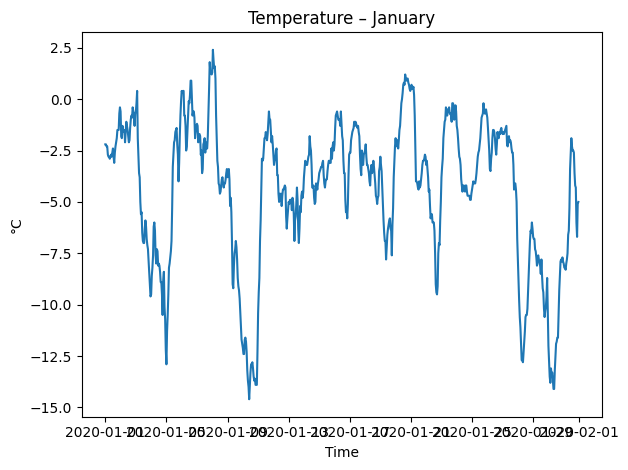

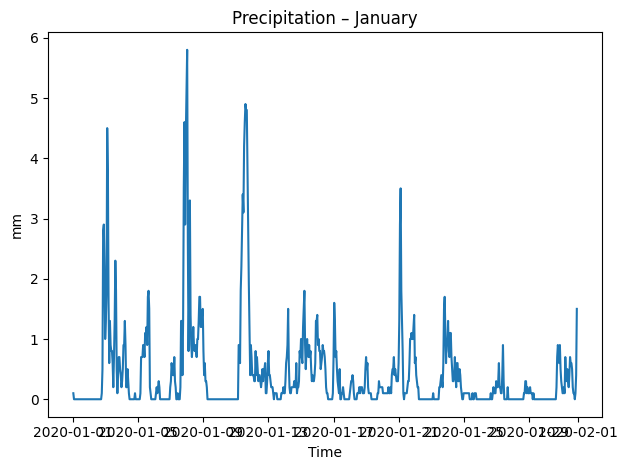

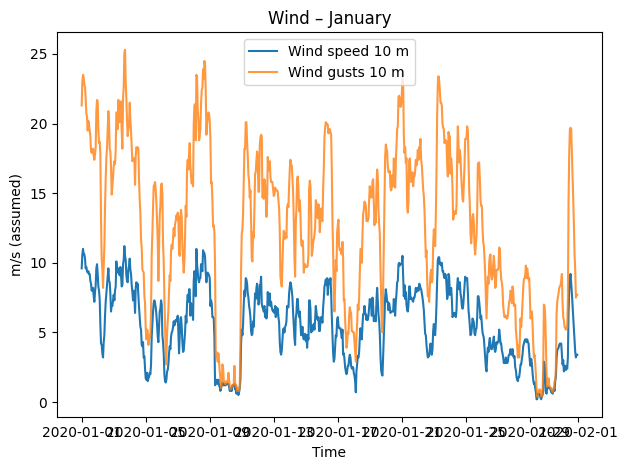

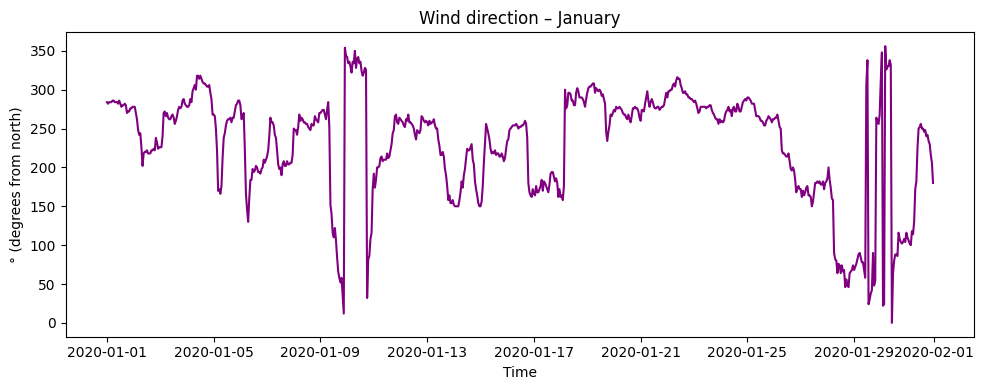

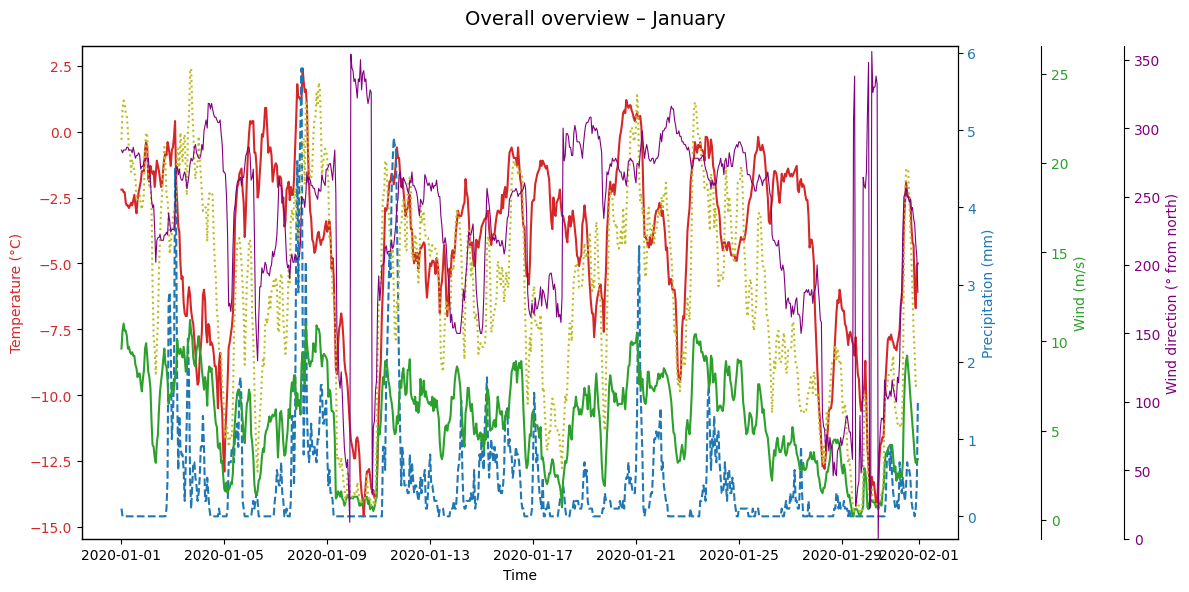

In [24]:
import matplotlib.pyplot as plt

# Temperature
plt.figure()
plt.plot(df_month[time_col], df_month["Temperature_2m (°C)"])
plt.title("Temperature – January")
plt.xlabel("Time"); plt.ylabel("°C")
plt.tight_layout(); plt.show()

# Precipitation
plt.figure()
plt.plot(df_month[time_col], df_month["Precipitation (mm)"])
plt.title("Precipitation – January")
plt.xlabel("Time"); plt.ylabel("mm")
plt.tight_layout(); plt.show()

# Wind (speed and gusts together)
plt.figure()
plt.plot(df_month[time_col], df_month["Wind_speed_10m (m/s)"], label="Wind speed 10 m")
plt.plot(df_month[time_col], df_month["Wind_gusts_10m (m/s)"], label="Wind gusts 10 m", alpha=0.8)
plt.title("Wind – January")
plt.xlabel("Time"); plt.ylabel("m/s (assumed)")
plt.legend()
plt.tight_layout(); plt.show()

# Wind direction
plt.figure(figsize=(10, 4))
plt.plot(df_month[time_col], df_month["Wind_direction_10m (°)"], color="purple")
plt.title("Wind direction – January")
plt.xlabel("Time"); plt.ylabel("° (degrees from north)")
plt.tight_layout(); plt.show()

# Overall:
fig, ax1 = plt.subplots(figsize=(12, 6))

# === Temperature (Primary axis) ===
if "Temperature_2m (°C)" in df_month.columns:
    ax1.plot(df_month[time_col], df_month["Temperature_2m (°C)"],
             color="tab:red", label="Temperature (°C)")
    ax1.set_ylabel("Temperature (°C)", color="tab:red")
    ax1.tick_params(axis='y', labelcolor="tab:red")

# === Precipitaion (Secondary axis) ===
if "Precipitation (mm)" in df_month.columns:
    ax2 = ax1.twinx()
    ax2.plot(df_month[time_col], df_month["Precipitation (mm)"],
             color="tab:blue", linestyle="--", label="Precipitation (mm)")
    ax2.set_ylabel("Precipitation (mm)", color="tab:blue")
    ax2.tick_params(axis='y', labelcolor="tab:blue")

# === Windspeed and gusts (Tertiary axis) ===
has_wind = all(c in df_month.columns for c in ["Wind_speed_10m (m/s)", "Wind_gusts_10m (m/s)"])
if has_wind:
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))
    ax3.plot(df_month[time_col], df_month["Wind_speed_10m (m/s)"],
             color="tab:green", label="Wind speed (m/s)")
    ax3.plot(df_month[time_col], df_month["Wind_gusts_10m (m/s)"],
             color="tab:olive", linestyle=":", label="Wind gusts (m/s)")
    ax3.set_ylabel("Wind (m/s)", color="tab:green")
    ax3.tick_params(axis='y', labelcolor="tab:green")

# === Wind direction (Quaternary axis) ===
if "Wind_direction_10m (°)" in df_month.columns:
    ax4 = ax1.twinx()
    ax4.spines["right"].set_position(("outward", 120))
    ax4.plot(df_month[time_col], df_month["Wind_direction_10m (°)"],
             color="purple", linewidth=0.8, label="Wind direction (°)")
    ax4.set_ylabel("Wind direction (° from north)", color="purple")
    ax4.tick_params(axis='y', labelcolor="purple")
    ax4.set_ylim(0, 360)

# === Shared formatting ===
ax1.set_xlabel("Time")
fig.suptitle("Overall overview – January", fontsize=14)
fig.tight_layout()
plt.show()


In [13]:
def pretty(col):
    base = re.sub(r"\s*\([^)]*\)\s*$", "", col).replace("_"," ").strip()
    return base.capitalize()

## Findings (short)
Værdata for januar

## Peproducibility
** Lokalt:
```bash
pip install -r requirements.txt
streamlit run main.py

## AI-use
In this project, I have used a combination of ChatGPT and GitHub Copilot (integrated in VS Code). Chat GPT assisted with interpreting and solving error messages, while Copilot provided code suggestions. For setup, installation of programs, and file creation, I received help from a fellom student in IND320 and a friend with more ecperioence than myself.

## Log
I started by downloading VS Code and creation main.py and ind320_notebook.ipynb. I saved these under Documents in a folder called IND320, with streamlit as a subfolder. In this folder, I also downloaded open-meteo-subset.csv.
Next, I downloaded the IND320 forlder from K.H.Liland´s GitHud repository and opened requirements.txt in my streamlit folder, but it was empty - so I wrote it manually an then ran it in the Terminal to intall the required packages.
I also created a README.md file to make it easy for new users to set up and use my app. In addition, I created accounts on GitHub and Streamlit, downloaded an image (shown on the Home page of the app), adjuseted the layout and structure, and pushed the project to GitHub so that others can access it.